In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [83]:
routes_to_neighborhoods = pd.read_csv('data/routes_to_neighborhoods_new.csv')
travel_times = pd.read_csv('data/travel_times.csv')

In [84]:
travel_times['route_id'] = travel_times['route_id'].apply(lambda x: '746' if str(x).startswith('746_') else x)
route_ids = routes_to_neighborhoods['route_id']
filtered_travel_times = travel_times[travel_times['route_id'].isin(route_ids)]

In [85]:
print(filtered_travel_times[['route_id', 'scheduled_travel_time', 'travel_time']])

       route_id scheduled_travel_time travel_time
0            26              00:10:00    00:10:06
1            21              00:14:00    00:13:53
2            42              00:11:00    00:10:30
3            24              00:21:00    00:19:33
4            24              00:24:00    00:22:29
...         ...                   ...         ...
333298       86              00:53:00    00:51:39
333299       86              01:00:00    00:51:53
333300       86              00:34:00    00:33:24
333301       86              00:48:00    00:45:01
333302       86              00:48:00    00:49:08

[242839 rows x 3 columns]


In [86]:
filtered_travel_times['scheduled_travel_time'] = pd.to_datetime(filtered_travel_times['scheduled_travel_time'], format='mixed')
filtered_travel_times['travel_time'] = pd.to_datetime(filtered_travel_times['travel_time'], format='mixed')
filtered_travel_times['lateness'] = (filtered_travel_times['travel_time'] - filtered_travel_times['scheduled_travel_time']).dt.total_seconds() / 60
average_lateness_by_route = filtered_travel_times.groupby('route_id')['lateness'].mean()
sorted_routes = average_lateness_by_route.sort_values(ascending=True)
five_least_late = sorted_routes.head(5)
five_most_late = sorted_routes.tail(5).sort_values(ascending=False)
most_late_route_ids = five_most_late.index.get_level_values('route_id').tolist()
least_late_route_ids = five_least_late.index.get_level_values('route_id').tolist()

print(most_late_route_ids)
print(least_late_route_ids)

C:\Users\munir\AppData\Local\Temp\ipykernel_27068\3850961901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['scheduled_travel_time'] = pd.to_datetime(filtered_travel_times['scheduled_travel_time'], format='mixed')


['746', 'CT2', '92', '121', '426']
['428', '14', '86', '505', '171']


C:\Users\munir\AppData\Local\Temp\ipykernel_27068\3850961901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['travel_time'] = pd.to_datetime(filtered_travel_times['travel_time'], format='mixed')
C:\Users\munir\AppData\Local\Temp\ipykernel_27068\3850961901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['lateness'] = (filtered_travel_times['travel_time'] - filtered_travel_times['scheduled_travel_time']).dt.total_seconds() / 60


In [87]:
# neighborhoods_most_late = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].astype(str).isin(most_late_route_ids)]['neighborhood']
# neighborhoods_least_late = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].astype(str).isin(least_late_route_ids)]['neighborhood']

# neighborhoods_most_late_list = [ast.literal_eval(neigh_str) for neigh_str in neighborhoods_most_late]
# neighborhoods_most_late_list = set([neighborhood for sublist in neighborhoods_most_late_list for neighborhood in sublist])
# neighborhoods_least_late_list = [ast.literal_eval(neigh_str) for neigh_str in neighborhoods_least_late]
# neighborhoods_least_late_list = set([neighborhood for sublist in neighborhoods_least_late_list for neighborhood in sublist])

# print(neighborhoods_most_late_list)
# print(neighborhoods_least_late_list)
# print(neighborhoods_least_late_list.intersection(neighborhoods_most_late_list))

In [88]:
most_late_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(most_late_route_ids)].copy()
most_late_routes_data = most_late_routes_data.drop(columns='stop_id')
most_late_routes_data['neighborhood'] = most_late_routes_data['neighborhood'].apply(eval)
most_late_routes_data['neighborhood'] = most_late_routes_data['neighborhood'].apply(lambda x: list(set(x)))

least_late_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(least_late_route_ids)].copy()
least_late_routes_data = least_late_routes_data.drop(columns='stop_id')
least_late_routes_data['neighborhood'] = least_late_routes_data['neighborhood'].apply(eval)
least_late_routes_data['neighborhood'] = least_late_routes_data['neighborhood'].apply(lambda x: list(set(x)))

In [89]:
print(most_late_routes_data)
print(least_late_routes_data)

   route_id                                       neighborhood
17      121                                      [East Boston]
58      426                                         [Downtown]
79      746                [South Boston Waterfront, Downtown]
84       92                            [Downtown, Charlestown]
87      CT2  [Charlestown, Mission Hill, Fenway, Roxbury, L...
   route_id                                       neighborhood
18       14  [Mission Hill, Roxbury, Jamaica Plain, Roslind...
22      171               [East Boston, South Boston, Roxbury]
59      428                                         [Downtown]
68      505                                         [Downtown]
80       86                   [Allston, Charlestown, Brighton]


In [97]:
census_data = pd.read_csv('data/census_data.csv', skiprows=1)

In [98]:
census_data = census_data.rename(columns={'White alone': 'White',
                     'Black or African American alone': 'Black/African American',
                     'Hispanic or Latino': 'Hispanic/Latino',
                     'Asian, Native Hawaiian and Pacific Islander alone, all ages': 'Asian/Native Hawaiian/Pacific Islander',
                     'Other Races or Multiple Races,  all ages': 'Other/Multiple Races'})

columns_interested = ['White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races', 'College/University student housing']

In [99]:
census_data.head()

,field concept,Total:,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,Total:.1,White alone.1,Black or African American alone.1,...,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant,household size,zipcode
0,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,3281,3214,0,67,10748,10027,721,2.156478,02134
1,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,0,1610,1487,0,123,11524,10006,1518,1.630122,"02199,02116,"
2,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,33,0,0,33,6037,5485,552,1.696080,"02108,02114,"
3,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,56,3796,3493,0,303,23653,22535,1118,2.126292,02135
4,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,0,55,0,30,25,9525,8932,593,2.128303,02129


In [100]:
def calculate_sum(route_neighborhoods, column):
    total_sum = 0
    filtered_census_data = census_data[census_data['field concept'].apply(lambda x: any(neigh in x for neigh in route_neighborhoods))]
    total_sum += filtered_census_data[column].sum()
    return total_sum

for column in columns_interested:
    most_late_routes_data[column] = most_late_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))
    least_late_routes_data[column] = least_late_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))

In [101]:
most_late_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing
17,121,[East Boston],15760,1403,21700,1932,2271,0
58,426,[Downtown],8730,569,967,3018,484,3283
79,746,"[South Boston Waterfront, Downtown]",13045,729,1283,3500,790,3283
84,92,"[Downtown, Charlestown]",22356,1559,3042,4668,1263,3283
87,CT2,"[Charlestown, Mission Hill, Fenway, Roxbury, L...",72250,32015,29667,21460,10019,23606


In [102]:
least_late_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing
18,14,"[Mission Hill, Roxbury, Jamaica Plain, Roslind...",105210,97000,73064,28113,26189,4246
22,171,"[East Boston, South Boston, Roxbury]",77269,29028,46103,10164,10092,2520
59,428,[Downtown],8730,569,967,3018,484,3283
68,505,[Downtown],8730,569,967,3018,484,3283
80,86,"[Allston, Charlestown, Brighton]",58856,4730,10710,16624,5151,6707


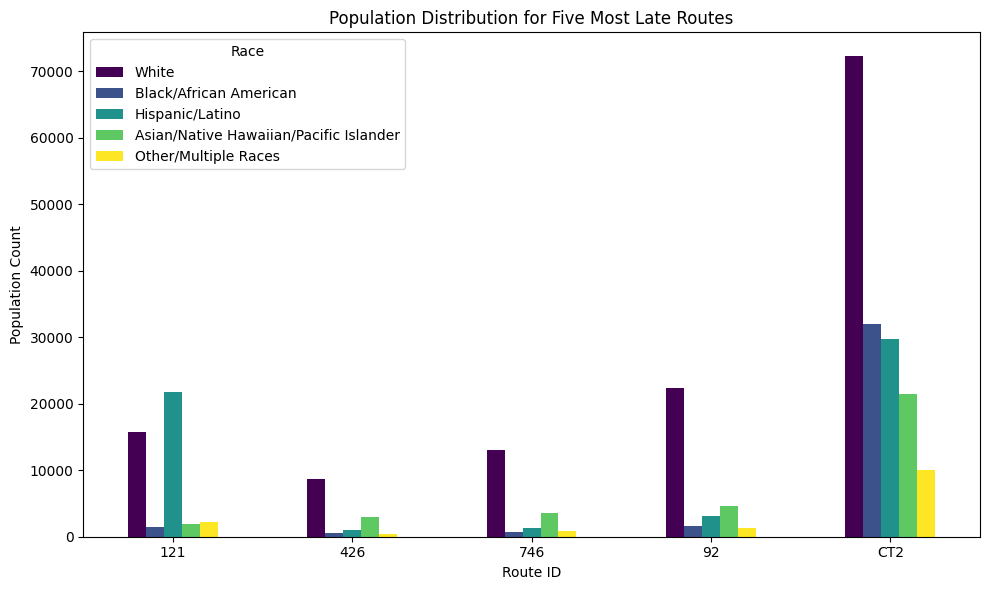

In [117]:
most_late_race_data = most_late_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
most_late_race_data.set_index('route_id', inplace=True)

most_late_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Most Late Routes')
plt.legend(title='Race')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

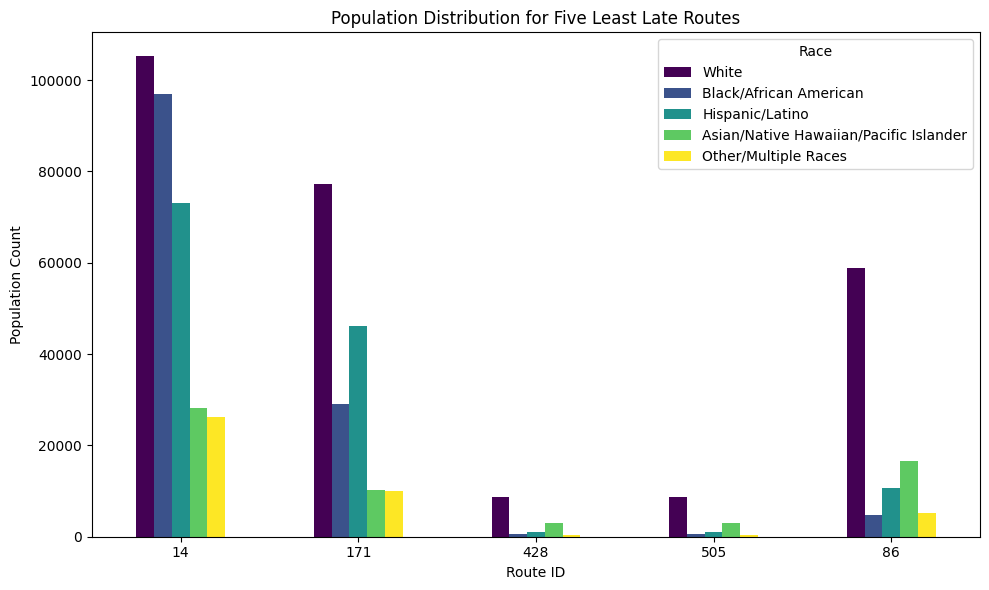

In [118]:
least_late_race_data = least_late_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
least_late_race_data.set_index('route_id', inplace=True)

least_late_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Least Late Routes')
plt.legend(title='Race')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

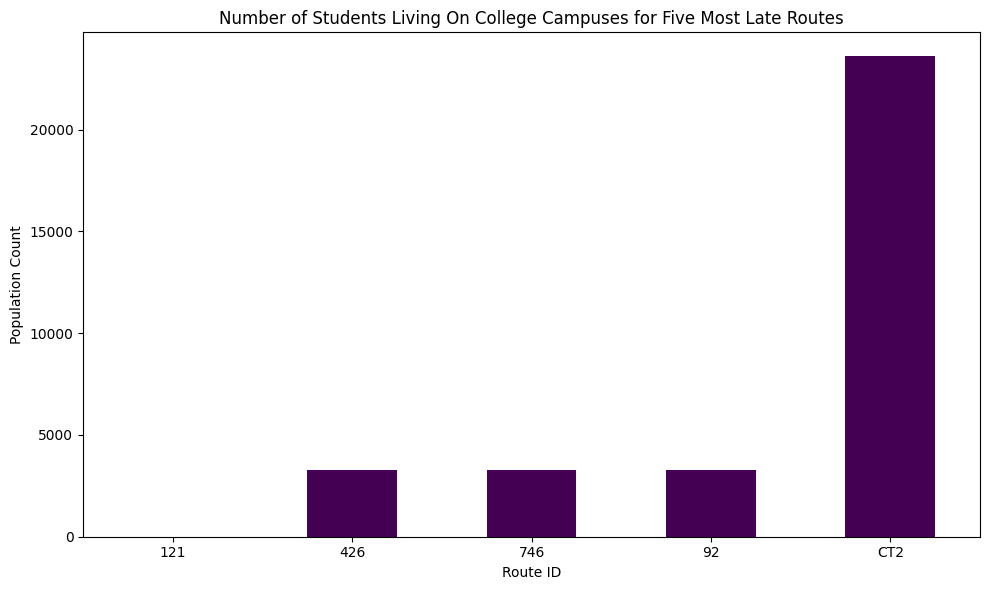

In [123]:
most_late_college_data = most_late_routes_data[['route_id', 'College/University student housing']]
most_late_college_data.set_index('route_id', inplace=True)

most_late_college_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Most Late Routes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

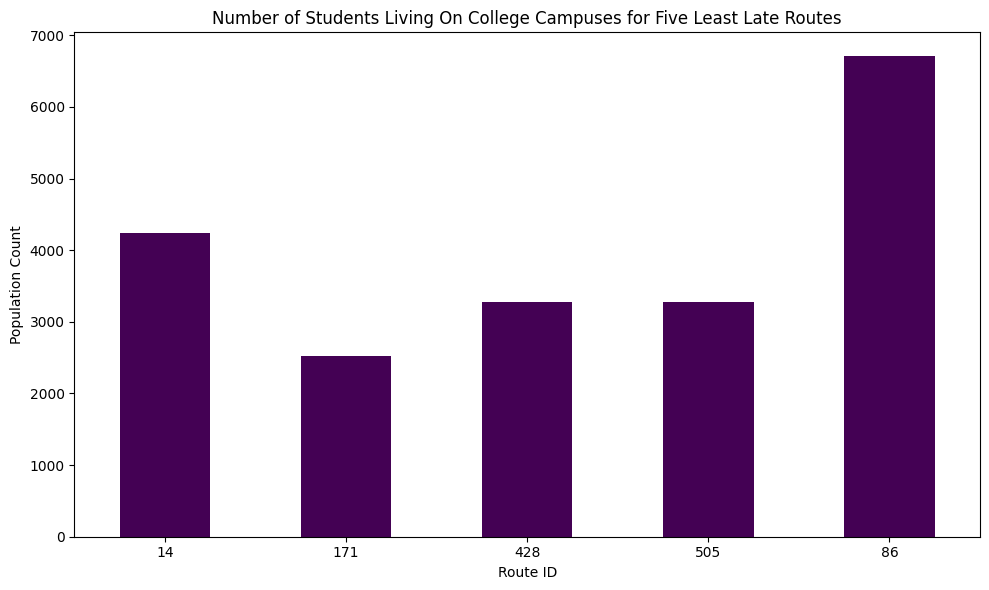

In [122]:
least_late_college_data = least_late_routes_data[['route_id', 'College/University student housing']]
least_late_college_data.set_index('route_id', inplace=True)

least_late_college_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Least Late Routes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()